# 데이터 전처리 연습문제

In [1]:
# 한 셀에서 여러 변수 출력코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings(action='ignore')

## 데이터 다운로드
- 타이타닉 탑승자 개인별 데이터를 보고 생존 여부를 예측하는 예제 데이터 - 이진분류

- Survival - 생존여부(타겟변수 y): 0 = No, 1 = Yes : 목적변수
- Pclass - 티켓(선실) 등급: 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex - 성별: male, female
- Age - 나이
- SibSp - 동승한 형제, 배우자 수
- Parch - 부모와 자녀의 수
- Ticket - 티켓 번호
- Fare - 승선 요금
- Cabin - 캐빈(객실) 번호
- Embarked - 승선한 항구: C = Cherbourg, Q = Queenstown, S = Southampton

In [96]:
data = pd.read_csv('../data/titanic_train.csv')
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [97]:
# 사본 사용
df = data.copy()

## 데이터 기본 정보
- info를 사용
- 컬럼 이름, 컬럼수(특성 수), 샘플수를 파악한다
- 카테고리형 타입(object)과 숫자형 타입(int, float)을 파악한다
 - 숫자 타입도 연속적인 값을 갖는 아나로그형과 카테고리형이 있다

In [7]:
# (1) 데이터 기본 정보 확인
# 컬럼 이름, 컬럼수(특성 수), 샘플수(행수) 파악
# 카테고리형 타입(object)과 숫자형 타입(int, float) 파악

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [99]:
# (2) 숫자형 데이터의 기본 통계값 확인 - object가 아닌 것들 제거
object_cols = df.select_dtypes(include=['object']).columns
new_df = df.drop(columns=object_cols)
# new_df

<Axes: >

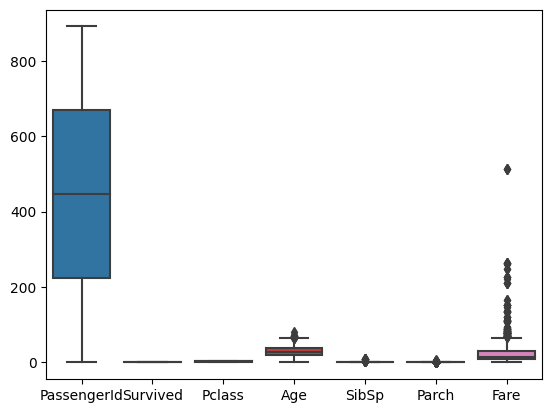

In [100]:
# (3) 박스 플롯으로 데이터의 전체적인 값의 범위 파악
import seaborn as sns
sns.boxplot(data=new_df)

In [101]:
# (4) 컬럼명 보기 - 복사해서 쓰기 편함
new_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


<Axes: >

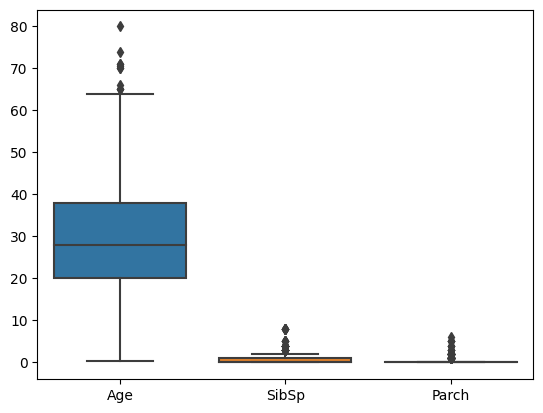

In [102]:
# (5) 특정 컬럼만 box plot으로 확인
# 나이, 동승한 형제/배우자, 부모/자녀 컬럼만 box plot으로 확인
# 'Age', 'SibSp','Parch'
sns.boxplot(data=new_df[['Age','SibSp','Parch']])

# 결측치 처리


In [146]:
# (6) 컬럼별 결측치 개수 확인
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Fare_log         0
dtype: int64

In [107]:
# (7) 데이터프레임의 전체 크기(행수와 열수)확인
# 제거전 컬럼수 확인
df.shape

(891, 12)

In [110]:
# (8) 특정 컬럼의 결측치 확인 및 제거
# Embarked 컬럼의 결측치 확인
df.loc[df['Embarked'].isnull()].index

# 항구 데이터(Embarked)는 결측치가 2개 뿐이고 
# 다른 값으로 대체하기가 어려우므로 샘플(행)을 삭제
df_del = df_del.drop(df.loc[df['Embarked'].isnull()].index)
df_del.shape


Index([61, 829], dtype='int64')

(889, 9)

In [147]:
# (9) 객실명 확인
# Cabin 칼럼의 결측치 확인 
df.loc[df['Cabin'].isnull()].index

# Cabin 종류 확인 
df['Cabin'].value_counts()
df[['Cabin']].head(5)
# Cabin = 객실명 (의미있는 정보는 아님)
# 객실명으로 생존여부 예측 불가
# 결측치도 너무 많고, 종류도 너무 많음
# 이런 경우 사용하지 않고 제거하는 것이 좋음

Index([  0,   2,   4,   5,   7,   8,   9,  12,  13,  14,
       ...
       878, 880, 881, 882, 883, 884, 885, 886, 888, 890],
      dtype='int64', length=687)

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN


In [112]:
# (10) 나이 컬럼의 결측치 확인
df.loc[df['Age'].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

<Axes: ylabel='Count'>

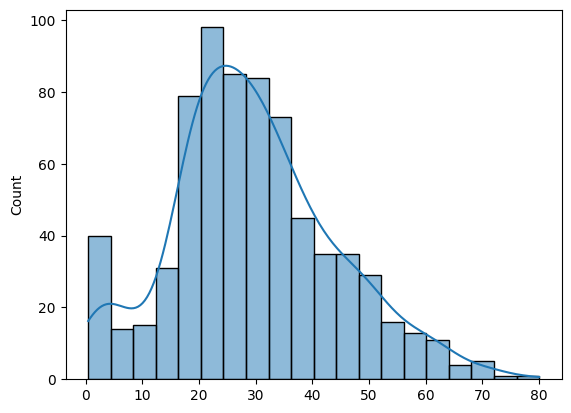

In [113]:
# (11) 히스토그램으로 나이 데이터 분포 확인 (구간:30)
sns.histplot(df.Age.values, kde=True)

In [114]:
# (12) 나이 평균 확인
df.Age.mean()

29.69911764705882

In [115]:
# (13) 결측치를 평균 나이로 대체 (데이터에 반영) 
# 좋은 방법은 아님(평균 나이 사람들만 나이를 미기재 하지는 않았을 것이므로)
# 지금은 결측치 대체 연습

# 결측치를 평균 나이로 대체
# 평균 : 정수로 변환해서 대체
# 0<영유아<1 만 존재, 나머지 수치는 정수이므로 평균 나이도 정수로 변환
# 실수로 저장해도 상관 없음

df2 = df.fillna(df['Age'].mean())
df2.shape


# 결측치 확인
df2.loc[df2['Age'].isnull()].index


(891, 12)

Index([], dtype='int64')

<Axes: ylabel='Count'>

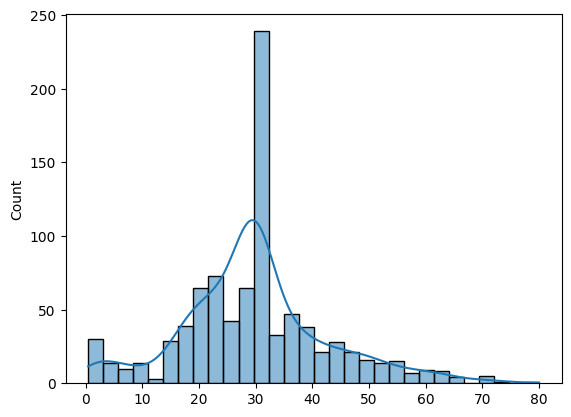

In [116]:
# 결측치를 평균값으로 대체한 후 나이 분포 확인
sns.histplot(df2.Age.values, kde=True)

## 카테고리 변수 변환

In [129]:
# (14) 선실 등급 확인 :  3가지 등급을 나타내는 카테고리 
df[["Pclass"]]
# 범주형 변수 인코딩 (get_dummies() 사용)
# 원핫 인코딩 결과를 별도의 데이터프레임으로 저장
# class_df
# 컬럼명 : Class_1, Class_2, Class_3
# prefix="Class" 열 제목에 Class를 붙여서 작성할 것
class_df = pd.get_dummies(df['Pclass'], prefix='Class_', dtype=int)

class_df # 후

,Pclass
0,3
1,1
2,3
3,1
4,3
...,...
886,2
887,1
888,3
889,1


,Class__1,Class__2,Class__3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [118]:
# (15) 성별 범주형 변수도 원핫 인코딩 변환 

# 성별의 구성 확인
df[['Sex']]


# 원핫 인코딩 결과를 별도의 데이터프레임 저장
# sex_df
# 컬럼명 : Sex_female, Sex_male

sex_df = pd.get_dummies(df['Sex'], prefix='Sex_', dtype=int)
sex_df


,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


,Sex__female,Sex__male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [119]:
# (16) 'Embarked' 항구명도 카테고리 변수이며 원핫 인코딩으로 변환


# 원핫 인코딩 후에 별도의 데이터프레임으로 생성
# embarked_df
# 컬럼명 : Embarked_C, Embarked_Q, Embarked_S

embarked_df = pd.get_dummies(df['Embarked'], prefix='Embarked_', dtype=int)
embarked_df

,Embarked__C,Embarked__Q,Embarked__S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


## 수치형 데이터 

<Axes: ylabel='Count'>

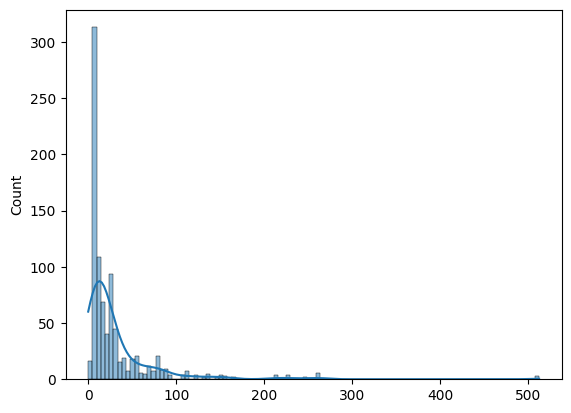

In [120]:
# (17) 'Fare' 요금 데이터 분포 확인하고 로그 변환
# 'Fare' 요금 데이터를 히스토그램으로 확인 (구간 수 : 15)
sns.histplot(df.Fare.values, kde=True)

<Axes: ylabel='Count'>

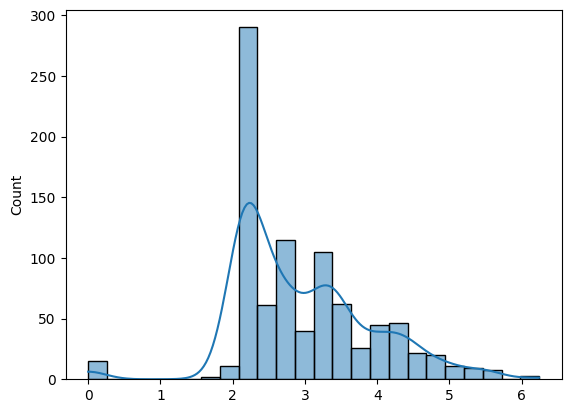

In [137]:
# 'Fare'요금 데이터 로그 변환 후 히스토그램으로 표시 
fare_df = pd.DataFrame(np.log1p(df['Fare']))
sns.histplot(fare_df.Fare.values, kde=True)


# 컬럼 취합
- 지금까지 전처리한 컬럼들을 모두 합침
- 기존 컬럼 + 로그변환 컬럼 + 원핫인코딩 변환 컬럼
- 'Age', 'SibSp', 'Parch', 'Fare', Embarked_C	Embarked_Q	Embarked_S	Class_1	Class_2	Class_3	Sex_female	Sex_male

In [138]:
# (18) 수치형 컬럼 먼저 선택
# final_df
# 선택 컬럼 : Age, SibSp, Parch
df_num = df[['Age','SibSp','Parch']]

,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S,Class__1,Class__2,Class__3,Sex__female,Sex__male
0,22.0,1,0,2.110213,0,0,1,0,0,1,0,1
1,38.0,1,0,4.280593,1,0,0,1,0,0,1,0
2,26.0,0,0,2.188856,0,0,1,0,0,1,1,0
3,35.0,1,0,3.990834,0,0,1,1,0,0,1,0
4,35.0,0,0,2.202765,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,2.639057,0,0,1,0,1,0,0,1
887,19.0,0,0,3.433987,0,0,1,1,0,0,1,0
888,NaN,1,2,3.196630,0,0,1,0,0,1,1,0
889,26.0,0,0,3.433987,1,0,0,1,0,0,0,1


In [140]:
# 요금은 로그 변환한 값 사용해서 final_df에 Fare 컬럼 추가
# 'Age', 'SibSp', 'Parch', 'Fare'
final_df = pd.concat((df_num, fare_df ),axis=1)
final_df

,Age,SibSp,Parch,Fare
0,22.0,1,0,2.110213
1,38.0,1,0,4.280593
2,26.0,0,0,2.188856
3,35.0,1,0,3.990834
4,35.0,0,0,2.202765
...,...,...,...,...
886,27.0,0,0,2.639057
887,19.0,0,0,3.433987
888,NaN,1,2,3.196630
889,26.0,0,0,3.433987


In [148]:
# 원핫 인코딩한 카테고리 변수 컬럼들을 가로로 붙임
# embarked_df, class_df, sex_df
# 'Age', 'SibSp', 'Parch', 'Fare', 
# Embarked_C Embarked_Q Embarked_S Class_1 Class_2 Class_3 Sex_female Sex_male
final_df = pd.concat((final_df, embarked_df, class_df, sex_df),axis=1)
final_df.head()

,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S,Class__1,Class__2,Class__3,Sex__female,Sex__male,Embarked__C,Embarked__Q,Embarked__S,Class__1,Class__2,Class__3,Sex__female,Sex__male
0,-0.530377,0.432793,-0.473674,-0.502445,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1
1,0.571831,0.432793,-0.473674,0.786845,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0
2,-0.254825,-0.474545,-0.473674,-0.488854,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0
3,0.365167,0.432793,-0.473674,0.420730,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0
4,0.365167,-0.474545,-0.473674,-0.486337,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1


## 스케일링 

In [23]:
# (19) 표준 스케일링 적용
# 'Age', 'SibSp', 'Parch', 'Fare' 열에 표준 스케일링 적용 

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
final_df[['Age', 'SibSp', 'Parch', 'Fare']] = scaler.fit_transform(df[['Age', 'SibSp', 'Parch', 'Fare']])

In [150]:
final_df 

,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S,Class__1,Class__2,Class__3,Sex__female,Sex__male,Embarked__C,Embarked__Q,Embarked__S,Class__1,Class__2,Class__3,Sex__female,Sex__male
0,-0.530377,0.432793,-0.473674,-0.502445,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1
1,0.571831,0.432793,-0.473674,0.786845,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0
2,-0.254825,-0.474545,-0.473674,-0.488854,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0
3,0.365167,0.432793,-0.473674,0.420730,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0
4,0.365167,-0.474545,-0.473674,-0.486337,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.185937,-0.474545,-0.473674,-0.386671,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1
887,-0.737041,-0.474545,-0.473674,-0.044381,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0
888,NaN,0.432793,2.008933,-0.176263,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0
889,-0.254825,-0.474545,-0.473674,-0.044381,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1
